## Convolutions and Filters for Computer Vision

In this notebook, to build and test your intuition for convolutions, we design some edge detection and smoothing filters.

1. Very simple edge detection filtering
    * vertical edge detection filter
    * horizontal edge detection filter
2. Prewitt edge detection filter
3. Gaussian smoothing filter


Let's first implement the two-dimensional cross-correlation operation, that takes in an image input array X and a filter window (convolution window, kernel) K,  positions the kernel at the top-left corner of the image input array and slides it across the image input array, both from left to right and top to bottom. The output is another image array, traditionally called "feature map".

In [1]:
def corr2d(X, K):
    h, w = K.shape
    X_K = np.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(X_K.shape[0]):
        for j in range(X_K.shape[1]):
            X_K[i, j] = (X[i: i + h, j: j + w] * K).sum()
    return X_K


You will see the original image, as well as an example of the image we get from applying our horizontal line detector to the image.
Fill in the code cell for vertical_line_conv. You will have to think about what numbers in the list will create a vertical line detector. Run this cell.
Add vertical_line_conv to conv_list. Run that cell. You will see the output of your vertical line filter underneath the horizontal line filter. You will also see a printed hint indicating if you got this right.

### 1. Very simple edge detection filtering

Let's now look at a simple application of the 2-d cross-correlation operation to detect (vertical) edges of an object in an image by finding the location of the pixel change. 



First, we construct an ‘image’ of 6×8 pixels. 

In [2]:
import numpy as np

X = np.ones((6, 8))
X[:, 2:6] = 0

In [3]:
print(X)

[[1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]]


Better yet, using colors:

In [4]:
import matplotlib.pyplot as plt

plt.imshow(X)

#### 1.2 Simple vertical edge detection filter

We can construct a very simple *vertical* edge filter by using a kernel K = [1, -1], with a height of 1 and width of 2. When we perform the cross-correlation operation with the input, if the horizontally adjacent elements are the same, the output is 0. Otherwise, the output is non-zero.

In [5]:
K = np.array([[1, -1]])

Let's perform the 2D cross-correlation with our image X with this kernel K, and examine the result. 

In [6]:
X_K = corr2d(X, K)

In [7]:
print(X_K)

[[ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]]


We detected 1 for the edge from white to black and -1 for the edge from black to white. The rest of the outputs are 0, as also shown in colors below. , you will design a vertical line detector. We'll apply it to each part of an image to create a new tensor showing where there are vertical lines.


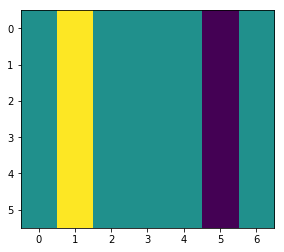

In [8]:
plt.imshow(X_K)

Note that if we apply the vertical kernel to the transposed image, no edges are found, as our kernel K only detects vertical edges.

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


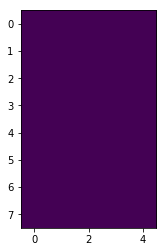

In [9]:
XT_K = corr2d(X.T, K)
print(XT_K)
plt.imshow(XT_K)

#### 1.2 Simple horizontal edge detection filter

However, we can also construct a very simple *horizontal* edge detection filter, that will find the horizontal edges of the transposed image.

In [10]:
K_horizontal_edges = np.array([[1], [-1]])

In [11]:
XT_K_horizontal_edges = corr2d(X.T, K_horizontal_edges)

In [12]:
print(XT_K_horizontal_edges)

[[ 0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [-1. -1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.  0.]]


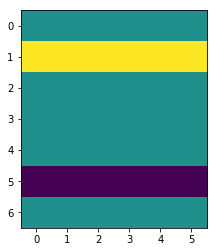

In [13]:
plt.imshow(XT_K_horizontal_edges)

### 2. Another edge detection filters

#### 2.1 Image Preprocessing

Taking an image as input, converting it to GrayScale, and padding to avoid sizing issues when filtering. 

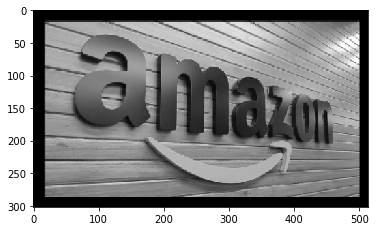

In [14]:
# Load an image
from PIL import Image
input_image = Image.open("../../DATA/CV/EMBK-NLP-AMAZON-IMG.png")

# Show the original image 
# plt.imshow(input_image, cmap=plt.get_cmap('gray'))
# plt.show()

# Creating an array from image data
image_np = np.array(input_image)

# Converting RGB image into GrayScale image
# Using formula:
# Y' = 0.299 R + 0.587 G + 0.114 B
image_GrayScale = image_np[:, :, 0] * 0.299 + image_np[:, :, 1] * 0.587 + image_np[:, :, 2] * 0.114

# Preparing the image for filtering
# Padding the GrayScale image with zero values
# Using NumPy method 'pad'
image_GrayScale_with_pad = np.pad(image_GrayScale, (1, 1), mode='constant', constant_values=0)

# Show the preprocessed image
plt.imshow(image_GrayScale_with_pad, cmap=plt.get_cmap('gray'))
plt.show()

#### 2.2 Prewitt filters

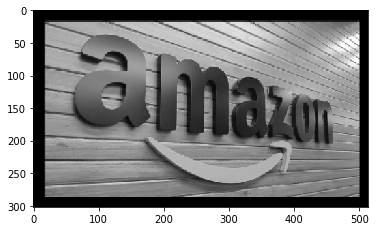

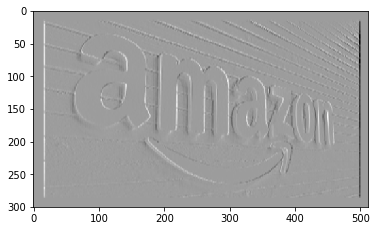

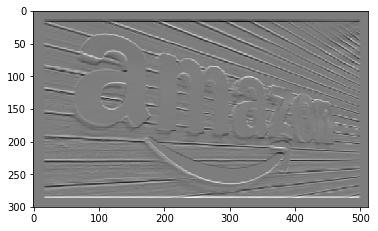

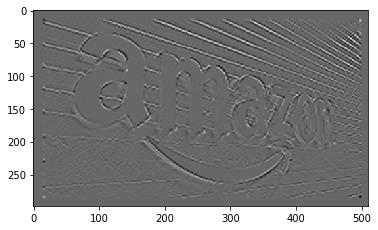

In [15]:
# Prewitt filter 3x3
Prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1],[-1, 0, 1]])
Prewitt_y = np.array([[1, 1, 1], [0, 0, 0],[-1, -1, -1]])

plt.imshow(image_GrayScale_with_pad, cmap=plt.get_cmap('gray'))
plt.show()

image_Prewitt_x = corr2d(image_GrayScale_with_pad, Prewitt_x)
plt.imshow(image_Prewitt_x, cmap=plt.get_cmap('gray'))
plt.show()

image_Prewitt_y = corr2d(image_GrayScale_with_pad, Prewitt_y)
plt.imshow(image_Prewitt_y, cmap=plt.get_cmap('gray'))
plt.show()

image_Prewitt = corr2d(image_Prewitt_y, Prewitt_x)
plt.imshow(image_Prewitt, cmap=plt.get_cmap('gray'))
plt.show()

### 2. Gaussian smoothing filter

Let's also see a smoothing Gaussian filter in action. When we apply a Gaussian filter to an image, we should see a smoothing effect.

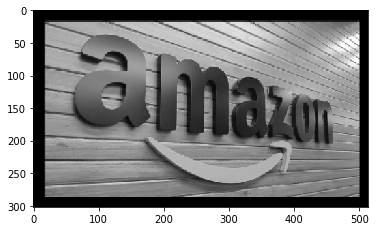

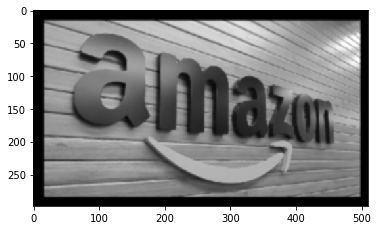

In [16]:
# Gaussian filter 5x5
Gauss = np.array([[1, 4, 7, 4, 1], [4, 16, 26, 16, 4], [7, 26, 41, 26, 7], [4, 16, 26, 16, 4], [1, 4, 7, 4, 1]])

plt.imshow(image_GrayScale_with_pad, cmap=plt.get_cmap('gray'))
plt.show()

image_Gauss = corr2d(image_GrayScale_with_pad, Gauss)
plt.imshow(image_Gauss, cmap=plt.get_cmap('gray'))
plt.show()